<a href="https://www.kaggle.com/code/ecemrnek/akbankmakine-renmesibootcamp?scriptVersionId=241451840" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### 1.  Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

In [2]:
dataset = pd.read_csv('/kaggle/input/nyc-house-prices/AB_NYC_2019.csv')
dataset.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


CSV dosyasını okuyup ilk 5 satırını görüntüledik.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Veri setinin genel genel bilgilerini görüntüledik:sütun adları, veri tipleri, boş değerler.

In [4]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Sayısal sütunlerin istatistiksel özelliklerinin özetini aldık.

In [5]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Eksik veri analizini yaptık.

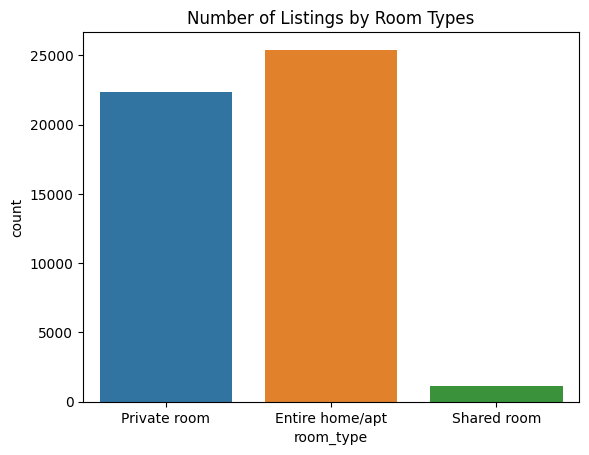

In [6]:
sns.countplot(x='room_type' , data= dataset)
plt.title('Number of Listings by Room Types')
plt.show()

Oda tiplerine göre dağılım grafiğini çizdik.

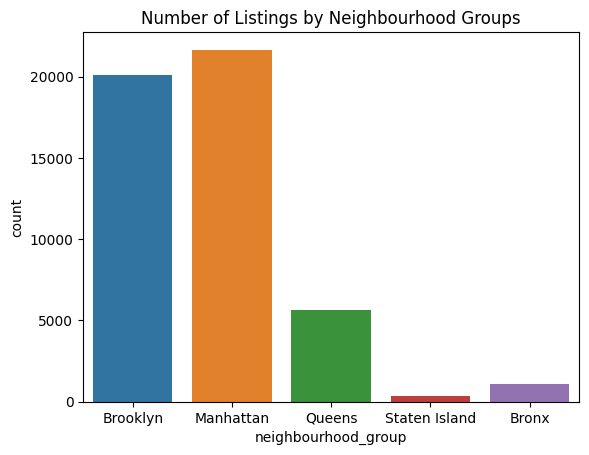

In [7]:
sns.countplot(x='neighbourhood_group', data= dataset)
plt.title('Number of Listings by Neighbourhood Groups')
plt.show()

Mahalle gruplarına göre dağılım grafiğini çizdik.

In [8]:
yenidataset = dataset[dataset['price']<500]

Görselleştirmede daha kolaylık olması ve daha güzel gözükmesi için price değerlerini filtreledik.

In [9]:
bins = [0, 50, 100, 200, 500]
labels = ['0-50$', '50-100$', '100-200$', '200-500$']
yenidataset['price_bins'] = pd.cut(yenidataset['price'], bins=bins, labels=labels)

/tmp/ipykernel_13/387087835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yenidataset['price_bins'] = pd.cut(yenidataset['price'], bins=bins, labels=labels)


Fiyatları kategoriledik.

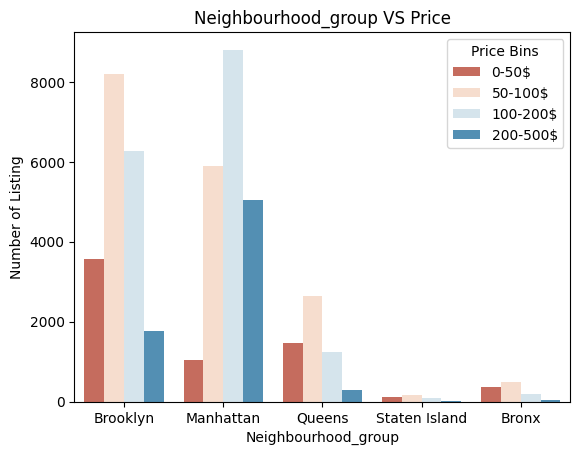

In [10]:
plt.figure()
sns.countplot(x='neighbourhood_group' , hue= 'price_bins' , data= yenidataset, palette= 'RdBu')
plt.title('Neighbourhood_group VS Price')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Number of Listing')
plt.legend(title='Price Bins')
plt.show()


Burada veri setini görselleştirmek için neighbourhood_group ve price_bins eksenlerine göre bir çubuk grafik oluşturduk. Her mahalle grubu için farklı fiyat aralıklarını renklendirerek bu mahalle grubundaki listeleme sayılarını gösterdik.

###2. Veri Ön İşleme

In [11]:
dataset.drop(['id','name','host_id','host_name'],axis=1, inplace=True)


Id, name, host_id, host_name gibi veriler modelleme için çok anlamlı değil o yüzden o sütunları kaldırdık.Verileri sütun bazlı kaldırabilmek için axis=1 yapısını kullandık. axis=0 yapısını kullansaydık satır bazlı işlem yapardık. Değişikliğin doğrudan veri seti üzerinden yapılması için de inplace=True yapısını kullandık.

In [12]:
dataset['reviews_per_month'].fillna(0, inplace=True)


/tmp/ipykernel_13/782431422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['reviews_per_month'].fillna(0, inplace=True)


 Keşifsel Veri Analizi kısmında eksik veri kontrolü yapmıştık. Burada gördüğümüz reviews_per_month sütunundaki eksik verileri 0 ile doldurabiliriz.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

One-Hot Encoding yapmak için gerekli olan kütüphaneler. One-Hot Encoding yapıyoruz için neighbourhood_group kategorik ve sırasız bir değişkendir.Örneğin Manhattan ve Brooklyn arasında sıralama yoktur.

In [14]:
dataset_model= dataset[['neighbourhood_group','price']].copy()

Sadece bizim için gerekli olan sütunları aldık.

In [15]:
dataset_model=dataset_model[dataset_model['price']<500]

Modelin düzgün çalışabilmesi için uç değerlerden temizledik.

In [16]:
dataset_encoded=pd.get_dummies(dataset_model['neighbourhood_group'],prefix='neighbourhood_group')
x=dataset_encoded
y=dataset_model['price']

Modeller sayısal değer ister ama neighbourhood_group gibi değişgenler string yapıdadır. Bu değişkeni sayısal değere dönüştürmek için One-Hot Encoding uyguladık.

prefix='neighbourhood_group' yapısını kullanmamızın nedeni de sütun adlarının hangi kategoriye ait olduğunu belli etmektir. Örneğin bu yapıyla Brooklyn değerini neighbourhood_group_Brooklyn olarak adlandırmış olduk. Bu yapı özellikle birden fazla kategoriye one_hot encoding uygulandığında karışıklık yaşanmasını önler.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Eğitim ve test veri setlerine ayırdık.

# **3.** **Algoritma Seçimi & Hiperparametre** **Optimizasyonu**

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

Gerekli olan kütüphaneleri ekledik.

In [19]:
models ={
    "Linear Regression" : LinearRegression(),
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "KNeighbors Regressor" : KNeighborsRegressor(),
    "SVR" : SVR()
}

Projemizinin hangi modelde daha iyi çalışacağını anlayabilmek için 5 farklı model oluşturup sözlük yapısında tuttuk.

Bu modellerin doğruluklarını çapraz doğrulama yöntemiyle değerlendirip her modelin ortalama hata değerini (RMSE) hesaplayacağız. En iyi modeli oluşturabilmek için hangi algoritmayı kullanmamız gerektiğini anlamış olacağız.

In [20]:
cv_results={}

Boş bir sözlük oluşturduk. Burada her modelin ortalama RMSE sonuçlarını tutacağız.

In [21]:
for name, models in models.items():
  scores = cross_val_score(models, x_train, y_train, cv=5,scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  cv_results[name] = rmse_scores.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Models sözlüğündeki her model ve onun adı üzerinde döngü kuruyoruz.cross_val_score sklearn fonksiyonu modelin performansını çapraz doğrulama ile ölçer. cv=5 yapısıda 5 katlı çapraz doğrulama yapılacağı anlamına geliyor. Yani veri 5 parçaya bölünüp 5 kez eğitim ve test yapılıyor. Daha sonra da RMSE hesaplanıp her model için RMSE değerlerinin ortalamaları cv_results sözlüğüne kaydediliyor.  

In [22]:
cv_results_sorted = dict(sorted(cv_results.items(), key=lambda item: item[1]))
cv_results_sorted

{'Decision Tree Regressor': 80.36211948121915,
 'Linear Regression': 80.36331354082378,
 'SVR': 82.84862741701555,
 'KNeighbors Regressor': 84.72237323709196,
 'Logistic Regression': 85.91357234735166}

cv_results.items() model adı ve ortalama RMSE değerlerinden oluşan bir liste verir ve değerler küçükten büyüğe sıraladıktan sonra sıralı listeyi tekrar sözlüğe çevirdik. Böylece en düşük RMSE'ye sahip model en başta olacak şekilde sıralnamış oldu.



# **4. MODEL OLUŞTURMA**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RMSE hesabımıza göre hata oranı en düşük model Linear Regression modeli oldu. Modeli kullanabilmek için gerekli olan kütüphaneleri ekliyoruz.

In [24]:
x = dataset_model.drop('price',axis=1)
y=dataset_model['price']

Price'ı tahmin etmek istiyoruz o yüzden price sütununu bağımlı değişken olarak olarak y değerine atadık daha sonra da drop fonksiyonu yardımıyla price sütunu hariç tüm sütunları bağımsız değişken yaparak x değerine atadık.

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Daha önceki kısımlarda veri setini eğitim test olarak bölmüştük o yüzden direkt eğitim veri seti yardımıyla modeli kurup eğitme aşamasına geçtik.

In [26]:
y_pred= model.predict(x_test)


Eğittiğimiz modelin, x_test verilerini kullanarak predict fonksiyonuyla tahmin yapmasını istiyoruz ve bu tahmin sonuçlarını y_pred değişkeninin içine atıyoruz.

In [27]:
print("Gerçek Fiyat=" , y_test.iloc[5])
print("Tahmin Fiyat=" , y_pred[5])

Gerçek Fiyat= 165
Tahmin Fiyat= 111.78125


#  **5.  Model Değerlendirme**

In [28]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE=", mae)

MAE= 59.75945335449014


MAE (Mean Absolute Error) modelin ortalama olarak tahminlerinde ne kadar sapma yaptığının gösterir.Yani gerçek değer olan y_test ile tahmin edilen değer olan y_pred arasındaki farkların mutlak değerlerinin ortalamasıdır.

In [29]:
mse=mean_squared_error(y_test,y_pred)
print("MSE=", mse)

MSE= 6393.2964738789


MSE (Mean Squared Error) gerçek değer ile tahmin edilen değer arasındaki karelerin ortalamasıdır.

In [30]:
rmse=np.sqrt(mse)
print("RMSE=", rmse)

RMSE= 79.95809198498236


In [31]:
r2= r2_score(y_test,y_pred)
print("R2=", r2)

R2= 0.10697954016735411


R^2 Skoru (Determinasyon Katsayısı) modelin ne kadar iyi açıkladığını gösteren oranlı bir değerdir.